<h1> Simulator</h1>

In [3]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import os
os.chdir('/home/niklas/Dokumente/Bachelor/Python/PythonScripts/SimulatorSetup/')
from Simulator import *


WARNING UserWarning: Using default configuration from /home/niklas/venv/lib/python2.7/site-packages/threeML-0.4.1199-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /home/niklas/.threeML/threeML_config.yml to customize it and avoid this warning.

INFO:keyring.backend:Loading KWallet
INFO:keyring.backend:Loading SecretService
INFO:keyring.backend:Loading Windows
INFO:keyring.backend:Loading chainer
INFO:keyring.backend:Loading macOS

WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



<h2> Setup a simulation</h2>

<p>Define the number of objects and the dimension of the spectrum matrix.</p>

In [4]:
n_objects=10
spectrumgrid=[4,4]
simulation=Simulator(n_objects,spectrumgrid)

<p>Choose between the Fibonacci and the better ModifiedFibonacci algorithm for source distribution and set boundaries for the spectrum parameters.</p>

In [15]:
simulation.setup(algorithm='Fibonacci',irange=[-1.6,-1],crange=[50,150],K=100)

<h2>Convert from Fermi cartesian frame to ICRS angles</h2>

<p>You have to define a position for Fermi by giving a sample trigdat file</p>

In [7]:
trigdat="/home/niklas/Dokumente/Bachelor/rawdata/191017391/glg_trigdat_all_bn191017391_v01.fit"
simulation.generate_j2000(trigdat)

<h2> Get detailed data about your Grid Points</h2>

In [8]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [-0.9410367521915347, -0.2333333333333334, -0.24495996934267378]
RA: 9d26m01.2921s 
DEC: 14d54m47.5467s


,0,1,2,3
0,Index=-1.6;Cutoff=50.0,Index=-1.6;Cutoff=216.66,Index=-1.6;Cutoff=383.33,Index=-1.6;Cutoff=550.0
1,Index=-1.4;Cutoff=50.0,Index=-1.4;Cutoff=216.66,Index=-1.4;Cutoff=383.33,Index=-1.4;Cutoff=550.0
2,Index=-1.2;Cutoff=50.0,Index=-1.2;Cutoff=216.66,Index=-1.2;Cutoff=383.33,Index=-1.2;Cutoff=550.0
3,Index=-1.0;Cutoff=50.0,Index=-1.0;Cutoff=216.66,Index=-1.0;Cutoff=383.33,Index=-1.0;Cutoff=550.0


<p>You can change your parameter boundaries afterwards while keeping everything else the same</p>

In [6]:
simulation.setup(algorithm='Fibonacci',irange=[-2.,-1.],crange=[100,200])

In [7]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [0.21373142977507384, -0.6814094774262411, 0.6999999999999998]
RA: 272d51m09.2161s 
DEC: -26d23m33.2985s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


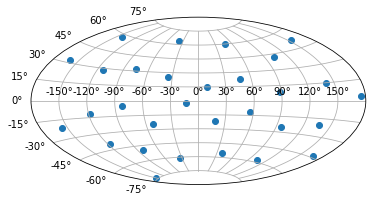

In [9]:
simulation.grid_plot()

<h2>Refining your Grid to get evener distribution</h2>

<p>Simulate physical points on the sphere and using coulomb repulsion to find distribution that maximises distance between all points.</p>

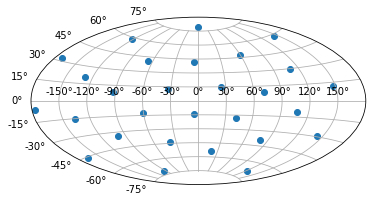

In [16]:
simulation.coulomb_refining(40)
simulation.generate_j2000(trigdat)
simulation.grid_plot()

<p> As you can see we got a significantly better distribution...</p>

In [13]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [ 0.19620562 -0.70983501  0.67648919]
RA: 274d20m21.0933s 
DEC: -24d28m32.8414s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


<p>... while keeping the spectrum matrix. So no need to recalculate this again.</p>
<p>If you are not happy with your distribution you can always refine it even more with coulomb_refining and maybe a larger step number</p>

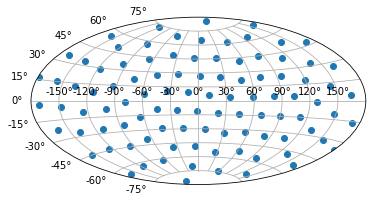

In [14]:
simulation.coulomb_refining(10)
simulation.generate_j2000(trigdat)
simulation.grid_plot()
simulation.grid[11].show()

<h2>Get Photon Count Spectra</h2>

<p>Until now we only have mathematical models how the spectra should look. But we need photon count spectra because that is what GBM measures. We also need to consider that each detector has a specific influence on the measured photon spectrum, depending on the energy of the photons and the direction where the photons are coming from. This information ist stored in a Detector Response Matrix (DRM).</p>
<p>For every GridPoint (Source) we have to calculate the DRMs for every detector and use them to get a physically reasonable photon spectrum. All of this is done by the following function:</p>

In [16]:
simulation.generate_DRM_spectrum()

<p>As you can see we get a threeML InstrumentResponse for each detector</p>

In [14]:
simulation.grid[1].response

{'b0': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f187681ccd0>,
 'b1': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f187681ce10>,
 'n0': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f1876828590>,
 'n1': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f18768284d0>,
 'n2': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f189ceba990>,
 'n3': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f189ceba410>,
 'n4': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f189ceba6d0>,
 'n5': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f189ceba910>,
 'n6': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f18768dc850>,
 'n7': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f18768dca50>,
 'n8': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f1876845c50>,
 'n9': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f1876845f10>,
 'na': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f18767e9c90>,
 'nb': <threeML.utils.OGI

<p>And we can plot the response and the count spectrum for each simulated sample spectrum. The entries correspond to the ones in the spectrum matrix.<p>

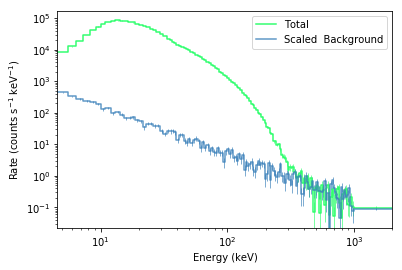

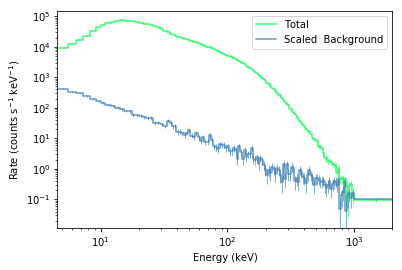

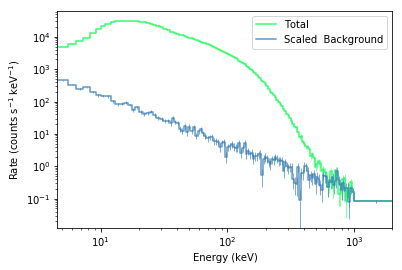

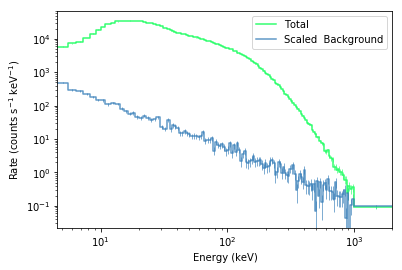

In [17]:
simulation.grid[5].photon_counts['n0'][0,0].view_count_spectrum();
simulation.grid[5].photon_counts['n0'][1,3].view_count_spectrum();
simulation.grid[5].photon_counts['n0'][3,1].view_count_spectrum();
simulation.grid[5].photon_counts['n0'][3,3].view_count_spectrum();

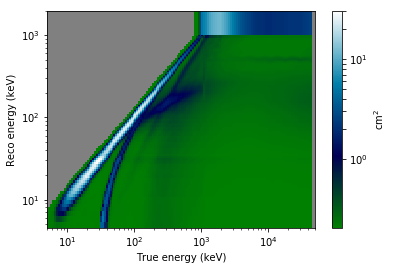

In [13]:
simulation.grid[5].photon_counts['n7'][1,2].display_rsp()

In [13]:
simulation.grid[5].show()

GBM Cartesian Coordinates: [-0.20320100741761893, -0.6333333333333334, -0.7467250092727267]
RA: 321d51m48.9618s 
DEC: 63d24m53.9729s


,0,1,2,3
0,Index=-1.6;Cutoff=50.0,Index=-1.6;Cutoff=216.66,Index=-1.6;Cutoff=383.33,Index=-1.6;Cutoff=550.0
1,Index=-1.4;Cutoff=50.0,Index=-1.4;Cutoff=216.66,Index=-1.4;Cutoff=383.33,Index=-1.4;Cutoff=550.0
2,Index=-1.2;Cutoff=50.0,Index=-1.2;Cutoff=216.66,Index=-1.2;Cutoff=383.33,Index=-1.2;Cutoff=550.0
3,Index=-1.0;Cutoff=50.0,Index=-1.0;Cutoff=216.66,Index=-1.0;Cutoff=383.33,Index=-1.0;Cutoff=550.0


In [3]:
?astromodels.Cutoff_powerlaw()

In [5]:
a=astromodels.Cutoff_powerlaw()

In [6]:
a

* description: A power law multiplied by an exponential cutoff
  * formula: $ K~\frac{x}{piv}^{index}~\exp{-x/xc} $
  * parameters:
    * K:
      * value: 1.0
      * desc: Normalization (differential flux at the pivot value)
      * min_value: 1.0e-30
      * max_value: 1000.0
      * unit: ''
      * is_normalization: true
      * delta: 0.1
      * free: true
    * piv:
      * value: 1.0
      * desc: Pivot value
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: false
    * index:
      * value: -2.0
      * desc: Photon index
      * min_value: -10.0
      * max_value: 10.0
      * unit: ''
      * is_normalization: false
      * delta: 0.2
      * free: true
    * xc:
      * value: 10.0
      * desc: Cutoff energy
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 1.0
      * free: true